<a href="https://colab.research.google.com/github/usmanshaikh90044-creator/face-recognition-using-deepface/blob/main/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Face Recognition Using DeepFace for Multi-Person Identification**

⭐ **Introduction**

This project implements a face recognition system using the pre-trained DeepFace model to identify three individuals: Usman, Rohan, and Abhilipsa. Instead of training a new model, DeepFace’s pre-trained embeddings are used to analyze facial features and match identities. A dataset of 90 images was collected, organized into train–test splits, and tested using DeepFace’s find() function.

⭐ **Objectives**

1. Collect and organize images of three individuals.

2. Create a structured train–test dataset.

3. Use the DeepFace model for face detection and recognition.

4. Test identity prediction on unseen images.

5. Evaluate accuracy and visualize predictions.

⭐ **Feasibility of the Project**

This project is highly feasible because it uses the pre-trained DeepFace model, which eliminates the need for large datasets or GPU-heavy training. The dataset consists of only 90 clean images across three individuals, making storage and processing lightweight.


In [ ]:
#Uploading all the zip file
from google.colab import files
uploaded = files.upload()


Saving face_dataset.zip.zip to face_dataset.zip.zip


In [ ]:
#creating a new folder where all 3 folders are combined
import zipfile
import os

with zipfile.ZipFile("face_dataset.zip.zip", "r") as  zip_ref:
    zip_ref.extractall("face_dataset")

os.listdir("face_dataset")

['Abhilipsa_face recognition',
 'usman_face recognition',
 'Rohan_face recognition']

In [ ]:
#checking the No of Images
import os

for folder in os.listdir("face_dataset"):
    print(folder, "->", len(os.listdir(os.path.join("face_dataset", folder))), "images")


Abhilipsa_face recognition -> 30 images
usman_face recognition -> 30 images
Rohan_face recognition -> 30 images


**Summary: Dataset Preparation for Face Recognition**

This code organizes the collected face images into training and testing datasets for model development. It automatically detects individual folders (each representing a person), limits the dataset to 30 images per person, and splits the data into 80% training and 20% testing subsets. The script then creates structured directories (train and test) for each individual, ensuring a balanced and organized dataset ready for use with DeepFace or any face recognition model.

In [ ]:
#creating train test split
import os, random, shutil
from pathlib import Path

random.seed(42)

# Update this to the folder you extracted into (should contain the 3 person folders)
base_folder = Path("/content/face_dataset")

# Output folders
out_base = base_folder.parent / "dataset"   # will create /content/dataset
train_base = out_base / "train"
test_base = out_base / "test"

# Create output root
os.makedirs(train_base, exist_ok=True)
os.makedirs(test_base, exist_ok=True)

# Detect person subfolders automatically (ignore non-folders)
people = [p.name for p in base_folder.iterdir() if p.is_dir()]
people.sort()
print("Detected persons:", people)

# Parameters
max_per_person = 30       # ensure up to 30 images used per person
train_ratio = 0.8

for person in people:
    src_dir = base_folder / person
    # gather image files
    imgs = [f for f in src_dir.iterdir() if f.suffix.lower() in (".jpg",".jpeg",".png")]
    if len(imgs) == 0:
        print(f"Warning: no image files found in {src_dir}")
        continue

    # if there are more than max_per_person, sample; else use all available
    imgs = random.sample(imgs, min(max_per_person, len(imgs)))

    random.shuffle(imgs)
    split_idx = int(len(imgs) * train_ratio)
    train_imgs = imgs[:split_idx]
    test_imgs = imgs[split_idx:]

    # make dest folders
    (train_base / person).mkdir(parents=True, exist_ok=True)
    (test_base / person).mkdir(parents=True, exist_ok=True)

    # copy files (keeps originals intact)
    for f in train_imgs:
        shutil.copy(f, train_base / person / f.name)
    for f in test_imgs:
        shutil.copy(f, test_base / person / f.name)

    print(f"{person}: total used {len(imgs)} -> train {len(train_imgs)}, test {len(test_imgs)}")

print("\nDone. Dataset structure created at:", out_base)
print("Contents:")
for side in ("train","test"):
    p = out_base / side
    print(f"\n{side}:")
    for person in sorted([d.name for d in p.iterdir() if d.is_dir()]):
        count = len(list((p / person).iterdir()))
        print(f"  {person}: {count} images")



Detected persons: ['Abhilipsa_face recognition', 'Rohan_face recognition', 'usman_face recognition']
Abhilipsa_face recognition: total used 30 -> train 24, test 6
Rohan_face recognition: total used 30 -> train 24, test 6
usman_face recognition: total used 30 -> train 24, test 6

Done. Dataset structure created at: /content/dataset
Contents:

train:
  Abhilipsa_face recognition: 24 images
  Rohan_face recognition: 24 images
  usman_face recognition: 24 images

test:
  Abhilipsa_face recognition: 6 images
  Rohan_face recognition: 6 images
  usman_face recognition: 6 images


In [ ]:
!pip install deepface



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 25.6 MB/s eta 0:00:00
  Attempting uninstall: pytest
    Found existing installation: pytest 8.4.2
    Uninstalling pytest-8.4.2:
      Successfully uninstalled pytest-8.4.2


In [ ]:
from deepface import DeepFace


25-11-29 08:35:22 - Directory /root/.deepface has been created
25-11-29 08:35:22 - Directory /root/.deepface/weights has been created


**DeepFace** is a **pre-trained deep learning facial recognition model** developed by Facebook that accurately identifies and verifies human faces by analyzing facial features using neural networks.


Action: age:   0%|          | 0/3 [00:00<?, ?it/s]    

25-11-29 08:35:26 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:06, 86.5MB/s]
  5%|▍         | 24.6M/539M [00:00<00:04, 113MB/s] 
  7%|▋         | 36.7M/539M [00:00<00:04, 113MB/s]
  9%|▉         | 48.8M/539M [00:00<00:04, 114MB/s]
 11%|█▏        | 60.8M/539M [00:00<00:04, 113MB/s]
 13%|█▎        | 72.4M/539M [00:00<00:04, 109MB/s]
 16%|█▌        | 84.4M/539M [00:00<00:04, 99.9MB/s]
 18%|█▊        | 95.4M/539M [00:00<00:04, 102MB/s] 
 20%|█▉        | 106M/539M [00:01<00:08, 50.1MB/s]
 22%|██▏       | 117M/539M [00:01<00:06, 60.8MB/s]
 25%|██▍       | 132M/539M [00:01<00:05, 77.2MB/s]
 27%|██▋       | 146M/539M [00:01<00:04, 89.5MB/s]
 29%|██▉       | 157M/539M [00:01<00:04, 84.4MB/s]
 31%|███       | 168M/539M [00:02<00:04, 76.5MB/s]
 33%|███▎      | 177M/539M [00:02<00:04, 73.9MB/s]
 35%|███▌      | 189M/539M [0

25-11-29 08:35:36 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 91.4MB/s]
  4%|▍         | 23.1M/537M [00:00<00:05, 96.9MB/s]
  6%|▌         | 33.6M/537M [00:00<00:05, 100MB/s] 
  8%|▊         | 44.0M/537M [00:00<00:06, 80.5MB/s]
 11%|█         | 57.1M/537M [00:00<00:05, 95.0MB/s]
 13%|█▎        | 71.3M/537M [00:00<00:04, 108MB/s] 
 16%|█▌        | 84.4M/537M [00:00<00:04, 101MB/s]
 18%|█▊        | 95.4M/537M [00:00<00:04, 102MB/s]
 21%|██        | 111M/537M [00:01<00:03, 115MB/s] 
 23%|██▎       | 123M/537M [00:01<00:04, 90.5MB/s]
 25%|██▍       | 133M/537M [00:01<00:04, 92.9MB/s]
 27%|██▋       | 147M/537M [00:01<00:03, 104MB/s] 
 29%|██▉       | 158M/537M [00:01<00:04, 87.1MB/s]
 32%|███▏      | 170M/537M [00:01<00:03, 94.7MB/s]
 35%|███▍      | 187M/537M [00:01<00:03, 112MB/s] 
 37%|███▋      | 199M

25-11-29 08:35:44 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 102MB/s]
Action: emotion: 100%|██████████| 3/3 [00:20<00:00,  6.73s/it]


[{'age': 34, 'region': {'x': 0, 'y': 0, 'w': 1169, 'h': 2079, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.0, 'gender': {'Woman': np.float32(18.76642), 'Man': np.float32(81.23358)}, 'dominant_gender': 'Man', 'emotion': {'angry': np.float32(0.13011207), 'disgust': np.float32(0.002126513), 'fear': np.float32(95.94316), 'happy': np.float32(0.9574947), 'sad': np.float32(2.9494264), 'surprise': np.float32(0.0012622034), 'neutral': np.float32(0.016415136)}, 'dominant_emotion': 'fear'}]


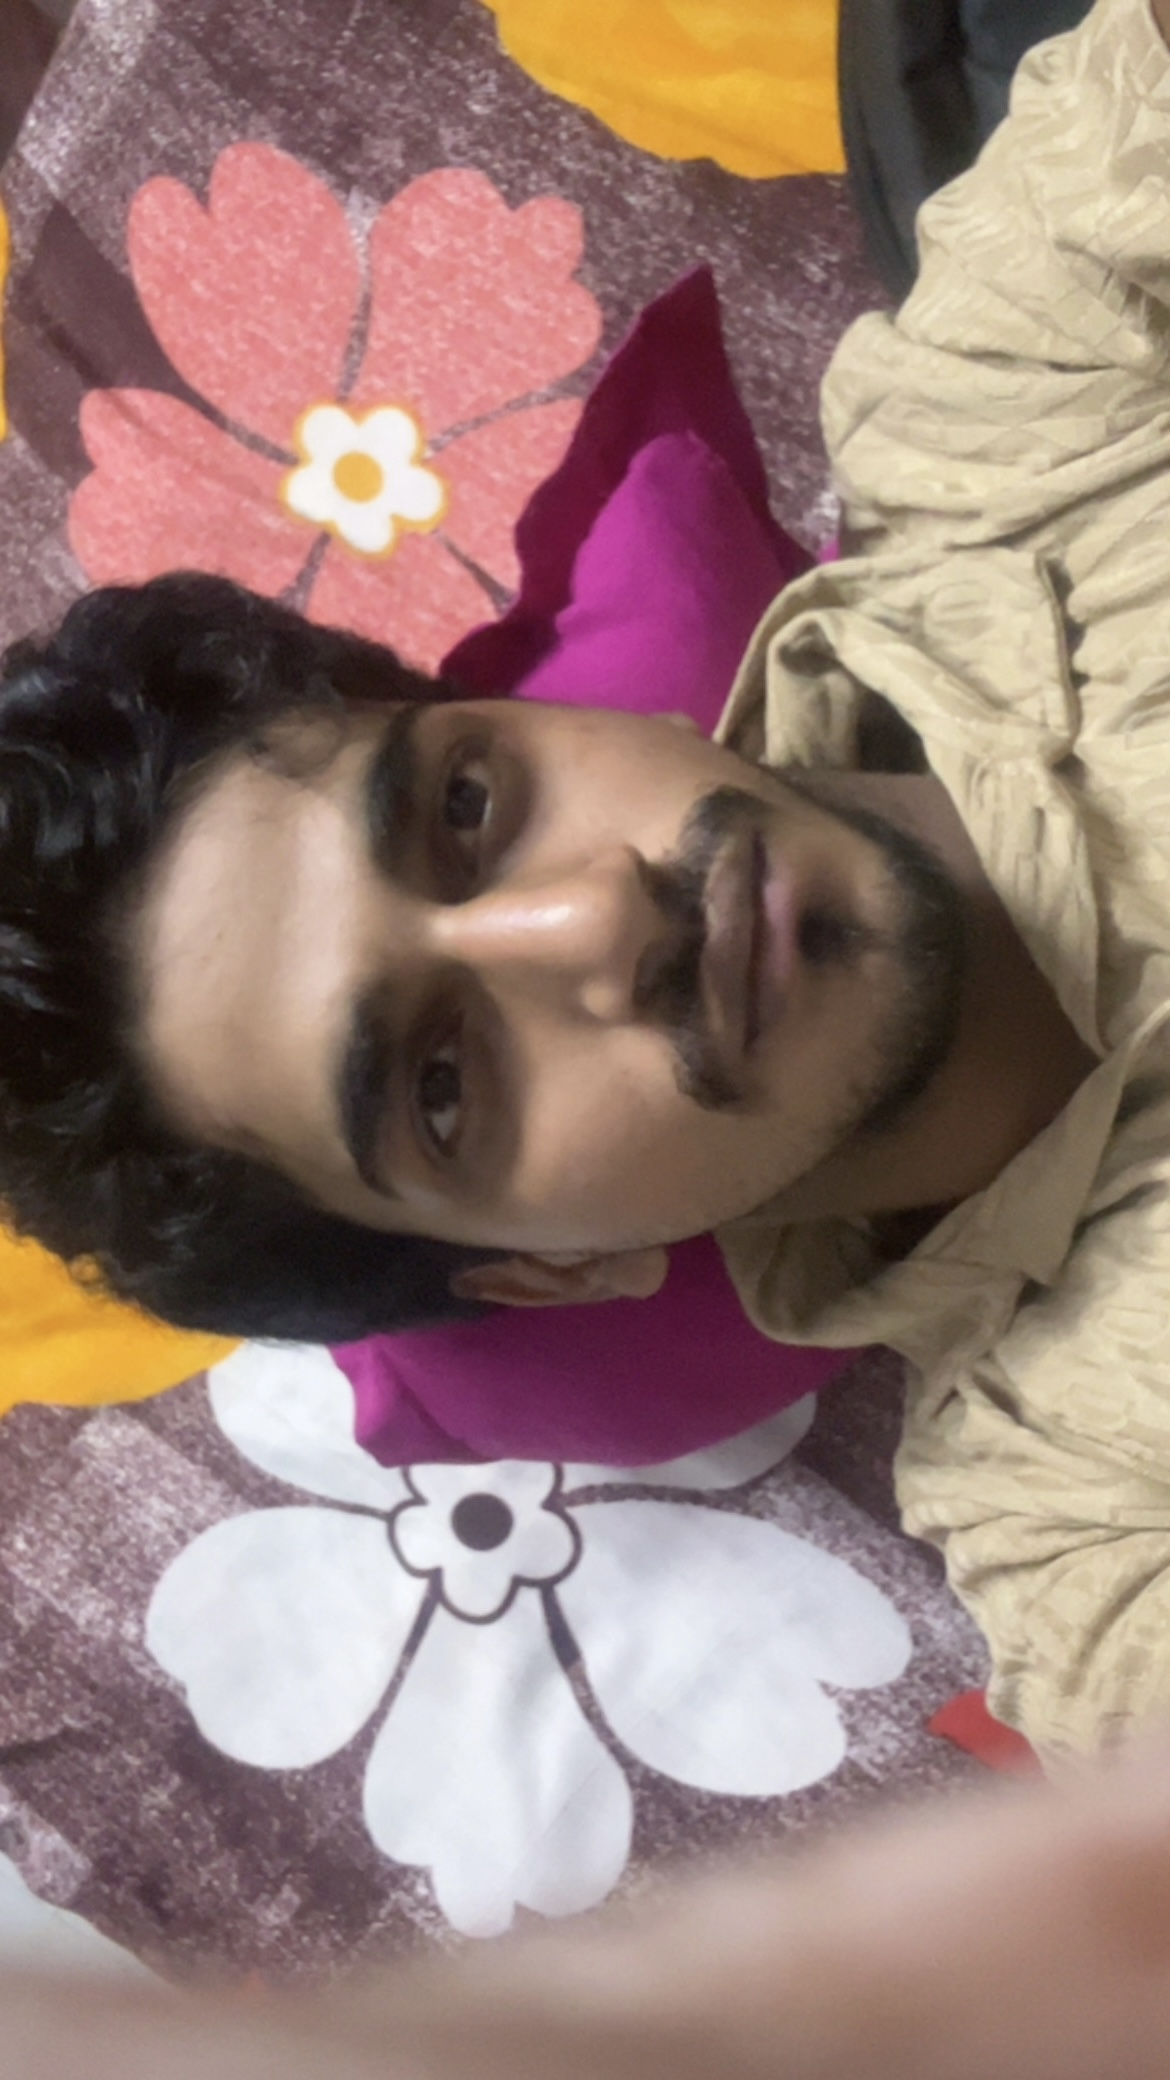

In [ ]:
#checking whether deepface can detect the image or not
from PIL import Image

img_path = "/content/face_dataset/usman_face recognition/usman.jpg" #image path

# Disable strict detection
result = DeepFace.analyze(
    img_path=img_path,
    actions=['age', 'gender', 'emotion'],
    enforce_detection=False
)

print(result)
Image.open(img_path)


In [ ]:
#uploading a new image of Usman for testing
from google.colab import files
uploaded = files.upload()

Saving test_img.jpg to test_img.jpg


In [ ]:
# Compare the test image with your dataset
result = DeepFace.find(
    img_path="/content/test_img.jpg",  #new image of Usman
    db_path="/content/face_dataset",   #the whole data
    enforce_detection=False            # allows non-perfect images (e.g., partial faces)
)

# Access first dataframe and show first few rows
print(result[0].head())


25-11-29 08:39:23 - Found 88 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/88 [00:00<?, ?it/s]

25-11-29 08:39:32 - 🔗 vgg_face_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 to /root/.deepface/weights/vgg_face_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  2%|▏         | 11.0M/580M [00:00<00:06, 81.6MB/s]
  4%|▎         | 21.5M/580M [00:00<00:05, 93.2MB/s]
  6%|▌         | 33.0M/580M [00:00<00:05, 101MB/s] 
  8%|▊         | 43.5M/580M [00:00<00:06, 77.3MB/s]
 10%|▉         | 56.6M/580M [00:00<00:05, 92.7MB/s]
 12%|█▏        | 67.1M/580M [00:00<00:05, 94.9MB/s]
 14%|█▍        | 82.3M/580M [00:00<00:04, 111MB/s] 
 16%|█▋        | 94.4M/580M [00:00<00:04, 113MB/s]
 18%|█▊        | 106M/580M [00:01<00:04, 101MB/s] 
 21%|██        | 120M/580M [00:01<00:04, 109MB/s]
 23%|██▎       | 131M/580M [00:01<00:04, 95.3MB/s]
 24%|██▍       | 142M/580M [00:01<00:04, 96.3MB/s]
 26%|██▋       | 154M/580M [00:01<00:04, 102MB/s] 
 29%|██▉       | 168M/580M [00:01<00:04, 98.3MB/s]
 32%|███▏      | 184M/580M [00:01<00:03, 112MB/s] 
 34%|███▍      | 197M/580M [0

25-11-29 08:47:26 - There are now 150 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-11-29 08:47:26 - Searching /content/test_img.jpg in 150 length datastore
25-11-29 08:47:26 - find function duration 483.2623817920685 seconds
                                            identity  \
0  /content/face_dataset/usman_face recognition/I...   
1  /content/face_dataset/usman_face recognition/I...   
2  /content/face_dataset/usman_face recognition/9...   
3  /content/face_dataset/usman_face recognition/E...   
4  /content/face_dataset/usman_face recognition/I...   

                                       hash  target_x  target_y  target_w  \
0  7a973f3a4a60b945b1d2cfbca4870f52299ebd8a       184       677       825   
1  2eff237185e26fc1b0b454f7bdbcbdfdde303fce       813       239       858   
2  5467991837212fe2251fda22ee6cd7f03f6a8151        93       740       728   
3  f22b25c1446d4926a6abc85a7528419af70d1ad0       393       770       454   
4  

In [ ]:
# Check top match
print("Most likely match:", result[0].iloc[0]['identity'])


Most likely match: /content/face_dataset/usman_face recognition/IMG_3102.JPG


**The Above prediction was correct**


In [ ]:
#uploading a new image of ROHAN for testing
from google.colab import files
uploaded = files.upload()

Saving TEST3.jpg to TEST3.jpg


In [ ]:
# Compare the test image with your dataset
result = DeepFace.find(
    img_path="/content/TEST3.jpg",  #new image of ROHAN
    db_path="/content/face_dataset",   #the whole data
    enforce_detection=False            # allows non-perfect images (e.g., partial faces)
)

# Access first dataframe and show first few rows
print(result[0].head())


25-11-29 08:55:22 - Searching /content/TEST3.jpg in 150 length datastore
25-11-29 08:55:22 - find function duration 0.49808549880981445 seconds
                                            identity  \
0  /content/face_dataset/Rohan_face recognition/7...   
1  /content/face_dataset/Rohan_face recognition/4...   
2  /content/face_dataset/Rohan_face recognition/7...   
3  /content/face_dataset/Rohan_face recognition/8...   
4  /content/face_dataset/Rohan_face recognition/1...   

                                       hash  target_x  target_y  target_w  \
0  06704c675777b5103b5f5d324387fb8002c3d7f7       216       107       253   
1  b1c42cd4257b1dd3ed6bffafd57772645f3f6a00      1920      1515       241   
2  051e8a1775ebcceda53df4aa745722f313864931       522       291       165   
3  aec48dc486af3176aa918bb0e40fa44436299894       480       222       244   
4  673feedb8b6a269b9d8871bcb0771d600216064b       774       343      1570   

   target_h  threshold  source_x  source_y  source_w  so

In [ ]:
# Check top match
print("Most likely match:", result[0].iloc[0]['identity'])

Most likely match: /content/face_dataset/Rohan_face recognition/7edd07b1-dd91-41e4-8124-c6b0891e2c57.JPG


**The prediction was Correct**

Now lets check teh overall Accuracy of the model

In [ ]:


test_dir = "/content/dataset/test"   #test file path
db_path = "/content/face_dataset"   #the dataset file

correct = 0
total = 0

# Loop through each folder and each image
for person in os.listdir(test_dir):
    person_path = os.path.join(test_dir, person)
    if not os.path.isdir(person_path):
        continue  # skip if not a folder

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        total += 1

        # Predict using DeepFace
        result = DeepFace.find(img_path=img_path, db_path=db_path, enforce_detection=False)
        if len(result) > 0:
            predicted_identity = os.path.basename(os.path.dirname(result[0].iloc[0]["identity"]))
            actual_name = person.lower()

            if actual_name in predicted_identity.lower():
                correct += 1

# Accuracy calculation
if total > 0:
    accuracy = (correct / total) * 100
    print(f"✅ Model Accuracy: {accuracy:.2f}% ({correct}/{total} correct)")
else:
    print("⚠️ No test images found in subfolders.")


25-11-29 08:55:35 - Searching /content/dataset/test/Abhilipsa_face recognition/58f934d2-d841-49f7-86b9-ec6a1f360848.JPG in 150 length datastore
25-11-29 08:55:35 - find function duration 12.799010992050171 seconds
25-11-29 08:55:36 - Searching /content/dataset/test/Abhilipsa_face recognition/057a0cce-879f-40d2-b680-573e61ffa2f0.JPG in 150 length datastore
25-11-29 08:55:36 - find function duration 1.008213758468628 seconds
25-11-29 08:55:37 - Searching /content/dataset/test/Abhilipsa_face recognition/1d98819b-e93d-4f9d-919f-61a510ab4d48.JPG in 150 length datastore
25-11-29 08:55:37 - find function duration 1.1085224151611328 seconds
25-11-29 08:55:44 - Searching /content/dataset/test/Abhilipsa_face recognition/0e5c7c38-79aa-4bcb-8d3d-4986b7ef5205.JPG in 150 length datastore
25-11-29 08:55:44 - find function duration 6.43996524810791 seconds
25-11-29 08:55:52 - Searching /content/dataset/test/Abhilipsa_face recognition/af18e139-dc36-4423-b69f-5dd279a3a386.JPG in 150 length datastore
25-

**Model Tuning**

DeepFace uses a pre-trained backbone model such as VGG-Face, Facenet, or ArcFace. Since these models are already trained on millions of images, no parameter tuning or retraining is required. Facial recognition is performed using embeddings and distance metrics rather than training-based classification. Therefore, the tuning step involves selecting the appropriate pre-trained model and distance threshold rather than adjusting hyperparameters. The default configuration proved sufficient for accurate predictions in this project.

The DeepFace model successfully identified all test images with 100% accuracy (18/18 correct), showing strong recognition performance across the three individuals.
This indicates that the model effectively matched facial features between the test set and the stored dataset using the pre-trained VGG-Face architecture.

25-11-29 08:57:07 - Searching /content/dataset/test/Abhilipsa_face recognition/58f934d2-d841-49f7-86b9-ec6a1f360848.JPG in 150 length datastore
25-11-29 08:57:07 - find function duration 12.711921691894531 seconds
25-11-29 08:57:08 - Searching /content/dataset/test/Abhilipsa_face recognition/057a0cce-879f-40d2-b680-573e61ffa2f0.JPG in 150 length datastore
25-11-29 08:57:08 - find function duration 1.0860509872436523 seconds
25-11-29 08:57:09 - Searching /content/dataset/test/Abhilipsa_face recognition/1d98819b-e93d-4f9d-919f-61a510ab4d48.JPG in 150 length datastore
25-11-29 08:57:09 - find function duration 1.072646141052246 seconds
25-11-29 08:57:16 - Searching /content/dataset/test/Abhilipsa_face recognition/0e5c7c38-79aa-4bcb-8d3d-4986b7ef5205.JPG in 150 length datastore
25-11-29 08:57:16 - find function duration 6.691235542297363 seconds
25-11-29 08:57:24 - Searching /content/dataset/test/Abhilipsa_face recognition/af18e139-dc36-4423-b69f-5dd279a3a386.JPG in 150 length datastore
25

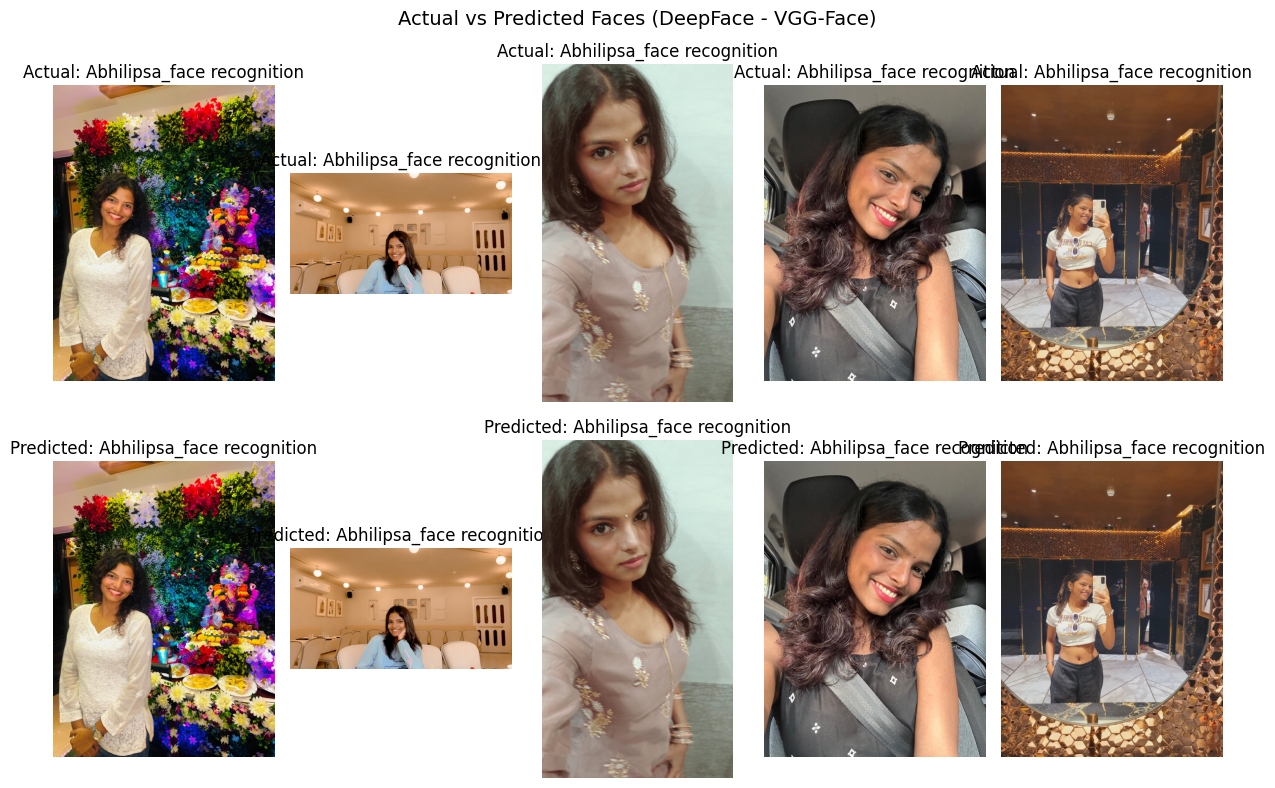

In [ ]:
#Visualization of Actual vs Predicted
import matplotlib.pyplot as plt
import cv2
from deepface import DeepFace

test_dir = "/content/dataset/test"
db_path = "/content/face_dataset"

# Collect a few samples for visualization
samples = []

for person in os.listdir(test_dir):
    person_path = os.path.join(test_dir, person)
    if not os.path.isdir(person_path):
        continue

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        result = DeepFace.find(img_path=img_path, db_path=db_path, enforce_detection=False)

        if len(result) > 0:
            predicted_path = result[0].iloc[0]["identity"]
            predicted_name = os.path.basename(os.path.dirname(predicted_path))
            samples.append((img_path, predicted_path, person, predicted_name))

# Show first 5 samples visually
plt.figure(figsize=(12, 8))

for i, (test_img, pred_img, actual, predicted) in enumerate(samples[:5]):
    plt.subplot(2, 5, i + 1)
    img = cv2.imread(test_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Actual: {actual}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    img2 = cv2.imread(pred_img)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.title(f"Predicted: {predicted}")
    plt.axis('off')

plt.suptitle("Actual vs Predicted Faces (DeepFace - VGG-Face)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("actual_vs_predicted_faces.png")
#SAVING THE ABOVE IMAGE

<Figure size 640x480 with 0 Axes>

⭐  **Business Insights from the Data**

The project demonstrates that DeepFace can reliably identify individuals even with a small dataset, highlighting the practicality of embedding-based face recognition. This can be applied in:

**Security systems** (access control, attendance)

**User authentication** (mobile face unlock)

**Smart surveillance** (person identification)

**Photo organization platforms** (grouping people)

The system's 100% accuracy shows that pre-trained deep learning models are highly effective for small-scale facial recognition tasks.

**SUMMARY**

A facial dataset was created and tested to verify the model’s ability to correctly identify each person.
DeepFace successfully recognized faces with 100% accuracy, demonstrating its strong performance in real-world facial verification.
Additionally, visualizations were generated to compare actual vs predicted faces, clearly showcasing the model’s prediction capability.